In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
techsash_waste_classification_data_path = kagglehub.dataset_download('techsash/waste-classification-data')

print('Data source import complete.')


Using Colab cache for faster access to the 'waste-classification-data' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_4545.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_4331.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_11136.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_1427.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_9102.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_5730.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_11919.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_3673.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_11187.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_2716.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_3133.jpg
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O/O_7974.jpg
/kaggle/input/waste-classification-data/datase

In [3]:
base_path = techsash_waste_classification_data_path

print("Inside dataset folder:")
print(os.listdir(os.path.join(base_path, "dataset")))


Inside dataset folder:
['DATASET']


In [4]:
data_root = os.path.join(base_path, "dataset", "DATASET")

train_path = os.path.join(data_root, "TRAIN")
test_path  = os.path.join(data_root, "TEST")


In [5]:
print("Train folders:", os.listdir(train_path))
print("Test folders:", os.listdir(test_path))


Train folders: ['R', 'O']
Test folders: ['R', 'O']


In [6]:
import cv2
from tqdm import tqdm
from collections import Counter

x_data = []
y_data = []

for label in os.listdir(train_path):
    label_path = os.path.join(train_path, label)

    for file in tqdm(os.listdir(label_path), desc=f"Loading {label}"):
        img_path = os.path.join(label_path, file)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        x_data.append(img)
        y_data.append(label)
data = pd.DataFrame({"image":x_data, "label":y_data})

print("Class distribution:", Counter(y_data))


Loading O: 100%|██████████| 12565/12565 [00:41<00:00, 300.74it/s]

Class distribution: Counter({'O': 12565, 'R': 9999})


In [7]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

In [8]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings("ignore")

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from sklearn.preprocessing import StandardScaler

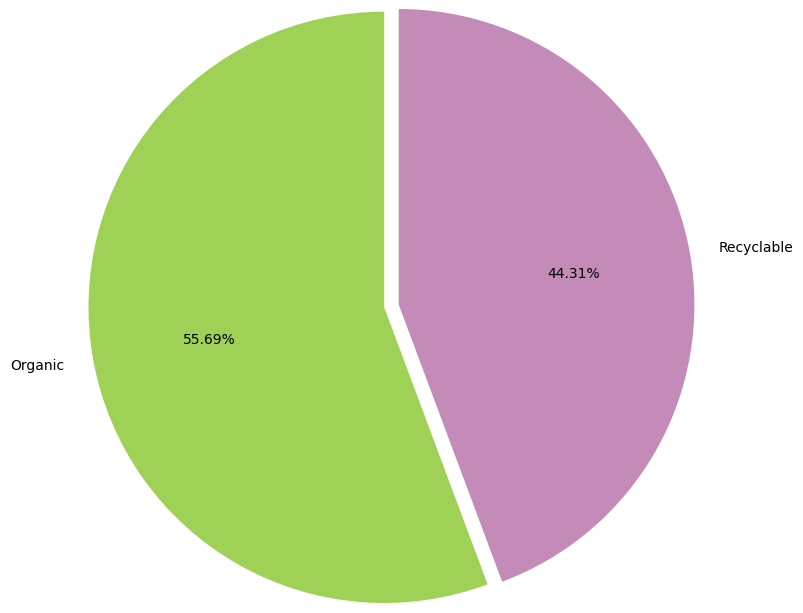

In [10]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05,0.05],autopct="%0.2f%%", labels=["Organic", "Recyclable"], colors=colors, radius=2)
plt.show()

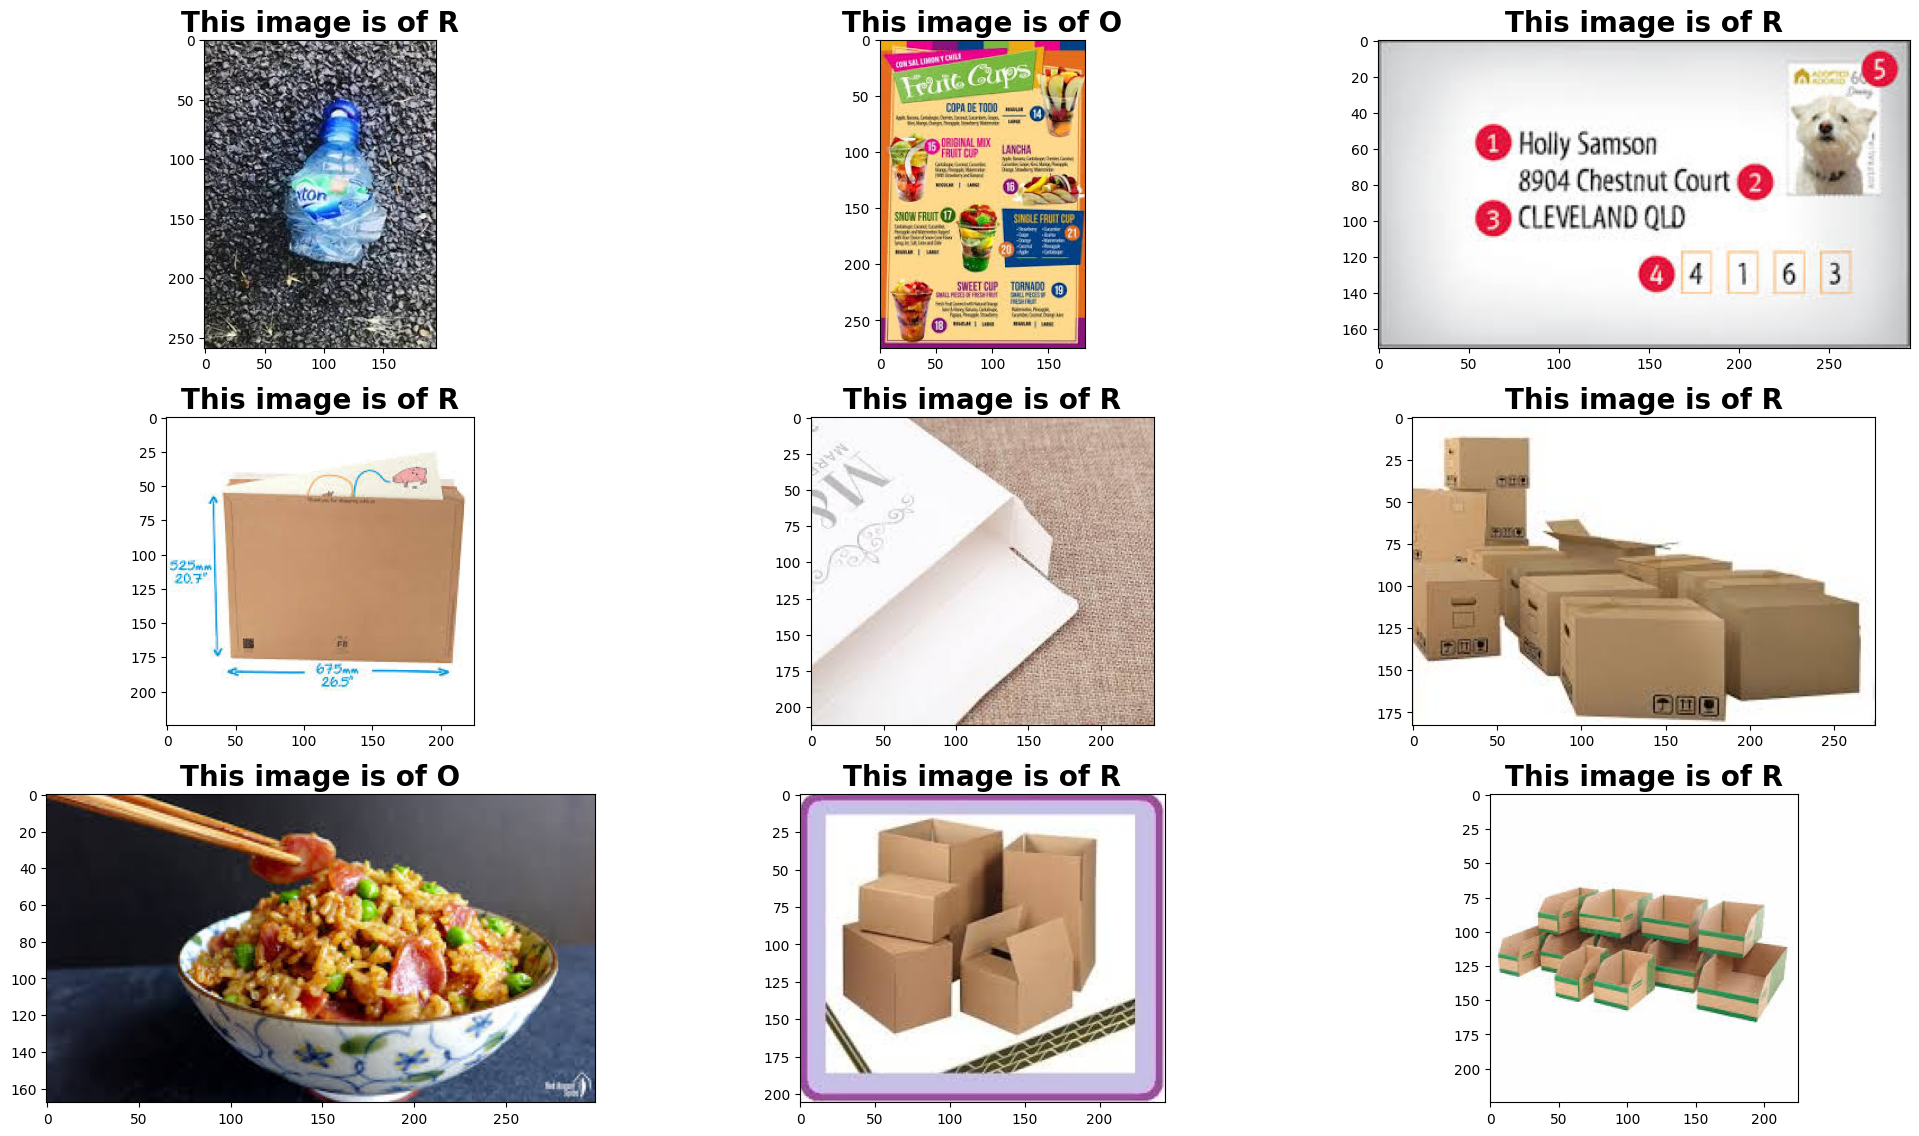

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title("This image is of {0}".format(data.label[index]), fontdict={"size":20, "weight":"bold"})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [12]:
className = glob(train_path+"/*")
numberOfClass = len(className)
print("Number of Class: ", numberOfClass)

Number of Class:  2


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

In [14]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 256

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen. flow_from_directory(train_path, target_size= (224,224), batch_size = batch_size, color_mode= "rgb", class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(test_path, target_size= (224,224), batch_size = batch_size, color_mode= "rgb", class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
hist = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 106s 926ms/step - accuracy: 0.7112 - loss: 0.6453 - val_accuracy: 0.8599 - val_loss: 0.3519
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 633ms/step - accuracy: 0.8283 - loss: 0.4132 - val_accuracy: 0.8942 - val_loss: 0.2984
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 615ms/step - accuracy: 0.8425 - loss: 0.3833 - val_accuracy: 0.8945 - val_loss: 0.2915
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 618ms/step - accuracy: 0.8576 - loss: 0.3470 - val_accuracy: 0.8942 - val_loss: 0.2680
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 616ms/step - accuracy: 0.8769 - loss: 0.3101 - val_accuracy: 0.8762 - val_loss: 0.2904
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 59s 657ms/step - accuracy: 0.8787 - loss: 0.2990 - val_accuracy: 0.8715 - val_loss: 0.3358
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 639ms/step - accuracy: 0.8996 - loss: 0.2575 - val_accuracy: 0.9057 - val_loss: 0.2646
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 633ms/step - accuracy: 0.9186 - loss: 0.2141 - val_acc

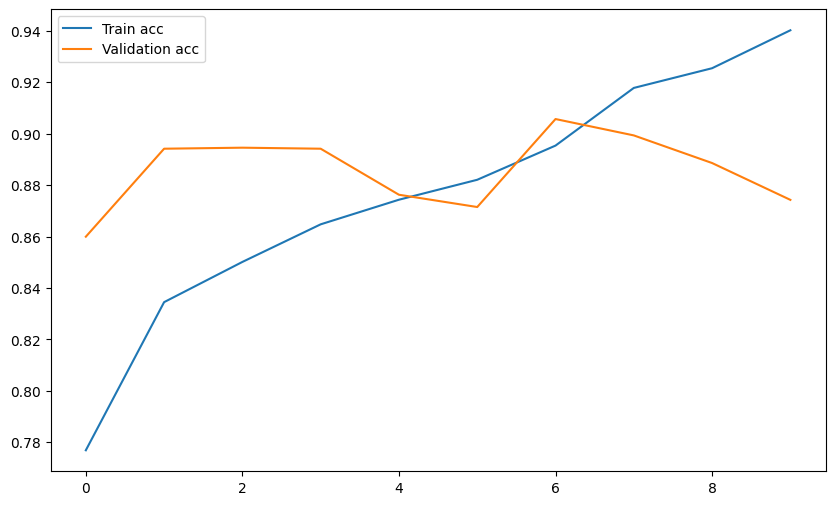

In [20]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

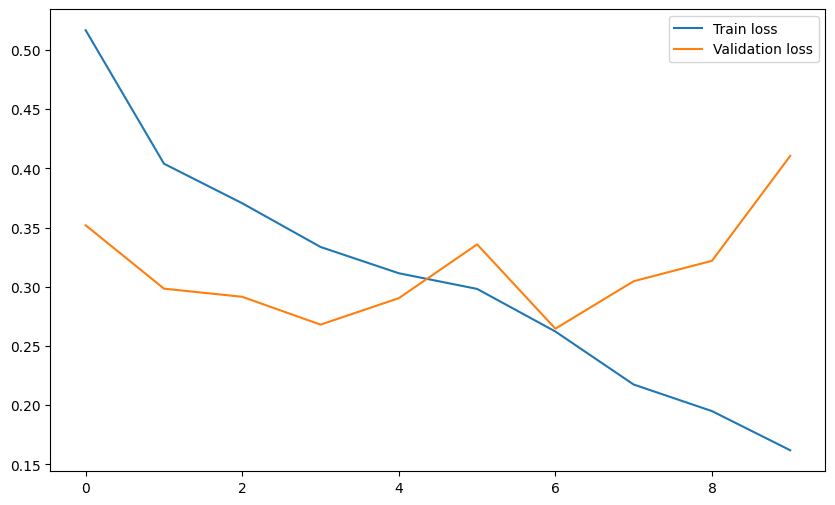

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [21]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result == 1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
This image -> Organic


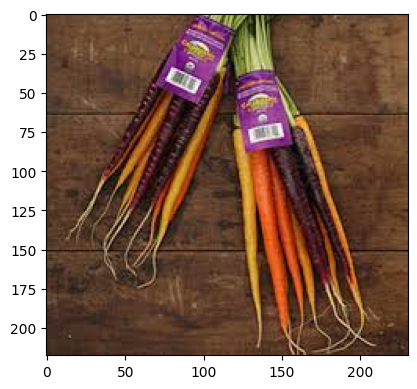

In [22]:
img_path = test_path + "/O/O_12573.jpg"
test_img = cv2.imread(img_path)
predict_func(test_img)

In [23]:
model.save("Waste Management System.h5")

In [25]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 154.9 MB/s eta 0:00:00


In [26]:
import streamlit as st
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import cv2

# Load the pre-trained Keras model
# Ensure the model file 'waste_classification_model.h5' is in the same directory or provide the full path.
model = load_model('/content/Waste Management System.h5')

# Define the class names for prediction output
class_names = ['Organic', 'Recyclable']

# Function to preprocess the image and make a prediction
def predict_waste_type(image_data):
    # Resize the image to the target size expected by the model
    img = image_data.resize((224, 224))
    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Normalize the image (if the model was trained with normalized data)
    # Assuming the model was trained with images scaled to 1./255
    img_array = img_array / 255.0

    # Expand dimensions to match the model's input shape (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)

    # The model outputs probabilities. For binary classification with sigmoid, if there's one output neuron
    # If the model has 2 output neurons with softmax and categorical_crossentropy, it will output 2 probabilities.
    # Let's assume binary_crossentropy with sigmoid (1 output neuron) or softmax with 2 output neurons.
    # For binary_crossentropy with sigmoid, predictions will be a single value between 0 and 1.
    # For categorical_crossentropy with 2 output neurons, predictions will be an array like [prob_organic, prob_recyclable]

    # Based on the model.add(Activation("sigmoid")) in cell 238ea04b and loss="binary_crossentropy",
    # it implies a single output neuron for binary classification.
    # A prediction value closer to 0 might indicate one class and closer to 1 the other.
    # The original code's predict_func used np.argmax for output, implying a 2-output neuron setup
    # but with sigmoid, it's usually a single output for one class probability. Let's adjust.

    # Given the previous context: `if result == 0: print("This image -> Recyclable") elif result == 1: print("This image -> Organic")`
    # This suggests that class 0 is 'Recyclable' and class 1 is 'Organic'.

    # With `model.add(Activation("sigmoid"))` for `numberOfClass` (which is 2)
    # and `loss="binary_crossentropy"`, this is a bit ambiguous.
    # If it's a single output neuron (binary classification), predictions is a (1,1) array.
    # If it's two output neurons (multi-class with binary loss), predictions is a (1,2) array.
    # Let's assume it's set up for two output neurons based on `Dense(numberOfClass)` and `np.argmax` in `predict_func`.

    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Streamlit app layout
st.title("Waste Classification App")
st.write("Upload an image to classify it as Organic or Recyclable waste.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")

    # Make prediction on button click
    if st.button('Classify'):
        with st.spinner('Classifying...'):
            predicted_label = predict_waste_type(image)
            st.success(f"Prediction: This waste is **{predicted_label}**")

st.markdown("--- App Developed for Waste Classification --- ")

# To run this Streamlit app:
# 1. Save this code into a Python file (e.g., `app.py`).
# 2. Open your terminal or command prompt.
# 3. Navigate to the directory where you saved `app.py`.
# 4. Run the command: `streamlit run app.py`
# 5. The app will open in your web browser.

2025-12-18 09:10:07.671 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.625 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-18 09:10:08.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-18 09:10:08.641 Thread 'MainThread': mi

DeltaGenerator()